In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
TempLJ = pd.read_csv("../Podatki/Temp_LJ.csv")

In [3]:
TempLJ.rename(columns={"LETO": "Leto", "MESEC": "Mesec", "TEMPERATURA": "Temperatura"}, inplace=True)

In [4]:
n = len(TempLJ)

Zapored = []
for i in range(n):
    Zapored.append(i)

Ena = []
for i in range(n):
    Ena.append(1)

Sin = []
for i in range(n):
    Sin.append(np.sin(math.pi*i/6))
    
Cos = []
for i in range(n):
    Cos.append(np.cos(math.pi*i/6))


In [5]:
TempLJ["ZaporedniMesec"] = Zapored
TempLJ["Ena"] = Ena
TempLJ["Sinus"] = Sin
TempLJ["Kosinus"] = Cos

In [32]:
TempLJ

,Leto,Mesec,Temperatura,ZaporedniMesec,Ena,Sinus,Kosinus
0,1986,1,0.1,0,1,0.000000,1.000000e+00
1,1986,2,-2.8,1,1,0.500000,8.660254e-01
2,1986,3,3.2,2,1,0.866025,5.000000e-01
3,1986,4,10.2,3,1,1.000000,6.123234e-17
4,1986,5,17.6,4,1,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...
415,2020,8,22.2,415,1,-0.500000,-8.660254e-01
416,2020,9,17.5,416,1,-0.866025,-5.000000e-01
417,2020,10,11.9,417,1,-1.000000,-1.028765e-14
418,2020,11,5.3,418,1,-0.866025,5.000000e-01


A del naloge - enostavna linarna regresija za spreminjanje temperature

In [7]:
Z = TempLJ["ZaporedniMesec"].to_numpy()
T = TempLJ["Temperatura"].to_numpy()

In [8]:
rezultat = stats.linregress(Z, T)

In [28]:
rezultat.slope*12

0.06830262238286094

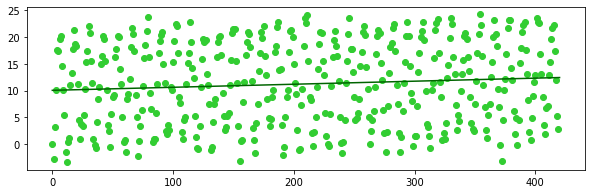

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
for i in range(n):
    plt.plot(TempLJ["ZaporedniMesec"][i], TempLJ["Temperatura"][i], "limegreen", marker="o")
x = np.linspace(0, 420, 840)
plt.plot(x, rezultat.slope*x + rezultat.intercept, color="darkgreen")
plt.savefig("EnLinReg.png")

In [10]:
SS = 0
SR = 0
MS = 0
MR = 0
F = 0

for i in range(n):
    Tpovp = TempLJ["Temperatura"].mean()
    SS += ((rezultat.slope*i + rezultat.intercept) - Tpovp)**2
    SR += (TempLJ["Temperatura"][i] - (rezultat.slope*i + rezultat.intercept))**2

MS = SS
MR = SR/(n-2)
F = MS / MR

In [11]:
F

3.4962909642275135

In [12]:
p = 0.06221 # dobimo s kalkulatorjem iz spleta

B del naloge - model z nihanjem temperature

In [13]:
S = TempLJ["Sinus"].to_numpy().reshape([n, 1])
C = TempLJ["Kosinus"].to_numpy().reshape([n, 1])
X = TempLJ["ZaporedniMesec"].to_numpy().reshape([n, 1])
Y = TempLJ["Temperatura"].to_numpy().reshape([n, 1])
Z = TempLJ["Ena"].to_numpy().reshape([n, 1])

In [14]:
A = np.concatenate((Z, X, S, C), axis=1)

In [15]:
B = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)

In [39]:
B[1]*12

array([0.06422445])

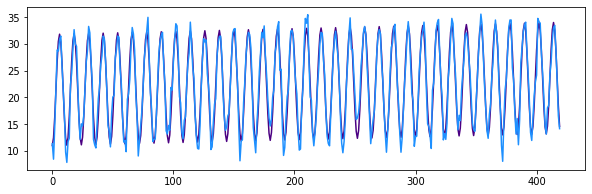

In [17]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.plot(np.dot(A, B) + TempLJ['Temperatura'].mean(), color="indigo")
plt.plot(Y + TempLJ['Temperatura'].mean(), color="dodgerblue")
plt.savefig("NihLinReg.png")

C del naloge - napoved za leto 2040 in interval zaupanja

In [18]:
Temp2040Lin = 0
Temp2040Nih = 0
for i in range(12):
    Temp2040Lin += rezultat.slope * (648 + i) + rezultat.intercept
    Temp2040Nih += B[0]+ B[1]*(648 + i) + B[2]*np.sin(math.pi*(648 + i)/6) + B[3]*np.cos(math.pi*(648 + i)/6)
Temp2040Lin = Temp2040Lin/12
Temp2040Nih = Temp2040Nih/12

In [19]:
TempJan = B[0]+ B[1]*648 + B[2]*np.sin(math.pi*648/6) + B[3]*np.cos(math.pi*648/6)

In [20]:
Temp2040Lin, Temp2040Nih, TempJan

(13.783863694832526, array([13.63297137]), array([3.21778426]))

In [21]:
import statsmodels.api as sm

In [22]:
tC = TempLJ['Temperatura'].values.tolist()
zC = TempLJ["ZaporedniMesec"].values.tolist()
mC = TempLJ["Leto"].values.tolist()
MC = sm.add_constant(mC)
ZC = sm.add_constant(zC)
model = sm.OLS(tC, ZC)
model2 = sm.OLS(tC, MC)
fit = model.fit()
fit2 = model2.fit()

In [23]:
SSx = 0
for i in range(n):
    SSx += (TempLJ["ZaporedniMesec"][i] - TempLJ["ZaporedniMesec"].mean())**2

In [24]:
SSxl = 0
for i in range(n):
    SSxl += (TempLJ["Leto"][i] - TempLJ["Leto"].mean())**2

In [25]:
(TempJan - 1.96566*np.sqrt(fit.mse_resid)*np.sqrt(1/n + (648 - TempLJ["ZaporedniMesec"].mean())**2/SSx), TempJan + 1.96566*np.sqrt(fit.mse_resid)*np.sqrt(1/n + (648 - TempLJ["ZaporedniMesec"].mean())**2/SSx))

(array([0.49553924]), array([5.94002928]))

In [26]:
(Temp2040Lin - 2.036933*np.sqrt(fit2.mse_resid)*np.sqrt(1/34 + (2040 - TempLJ["Leto"].mean())**2/SSxl), Temp2040Lin + 2.036933*np.sqrt(fit2.mse_resid)*np.sqrt(1/34 + (2040 - TempLJ["Leto"].mean())**2/SSxl))

(9.965539951737806, 17.602187437927245)